In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys, os, getpass, warnings
warnings.filterwarnings('ignore')
from patterns.visualizer import Visualizer
from patterns.fetcher import *
import numpy as np
vis = Visualizer(project_name='testrepo')
vis.get_data()
df = vis.commit_data
locc_metric = 'change-size-cos'

Database password: ·······


INFO: Loading testrepo data from database. This can take a while...
INFO: Loaded testrepo data from the database (exclude_forks=False, forks_only=False)
INFO: Cleaning up data and computing averages...
INFO: Done computing averages. 1 file changes (code only)


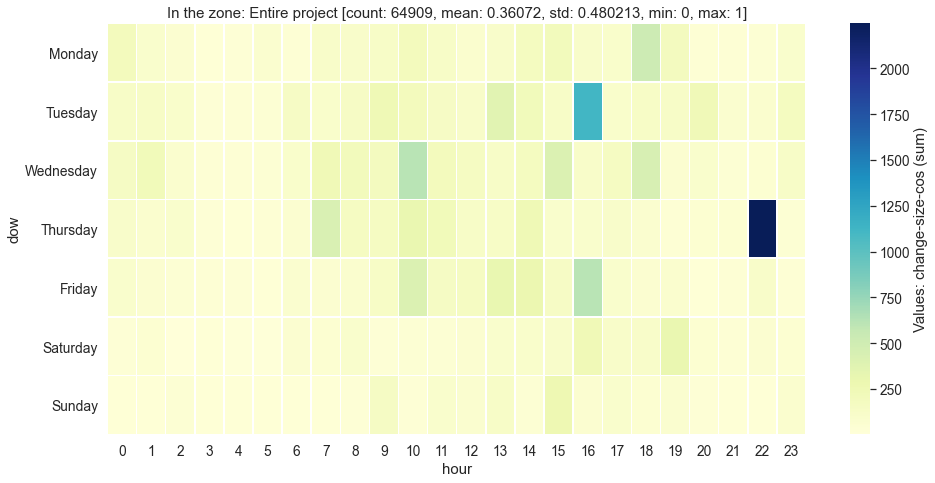

In [3]:
df = vis.plot_zone_heatmap(agg='sum')

In [4]:
df1 = df.groupby(["month"])
# For each group, calculate the average of only the metric column
df1 = df1.aggregate({locc_metric: np.sum})  
num_years = df.groupby(["year"]).count()[locc_metric].shape[0]
df1 = df1 / num_years
df1.head()

,change-size-cos
month,
1,312.444444
2,130.222222
3,170.666667
4,177.888889
5,136.333333


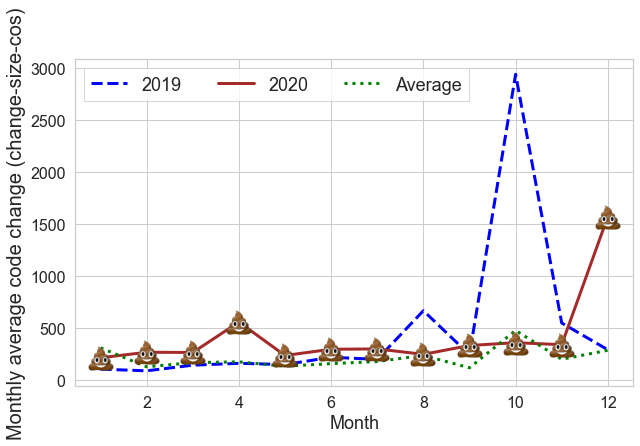

In [5]:
vis.how_was_2020('change-size-cos')

,change-size-cos
month,
1,0.442562
2,0.453481
3,0.379795
4,0.423679
5,0.461035


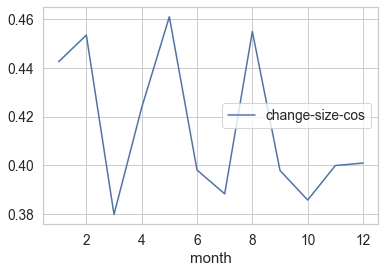

In [13]:
locc_metric='change-size-cos'
#df1 = df.groupby(["year", "month"])
df1 = df1.groupby(["month"])
# For each group, calculate the average of only the metric column
df1 = df1.aggregate({locc_metric: np.mean})  # monthly averages over all the years
#df1 = df1.groupby(["month"])
# Get the average values for each particular month over the year or all years if None
#df1['month_num'] = pd.DatetimeIndex(df1.index).month
df1.plot()
df1.head()

### Playground for testing, development

<ipython-input-4-636eb46882bd>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_eg.index)


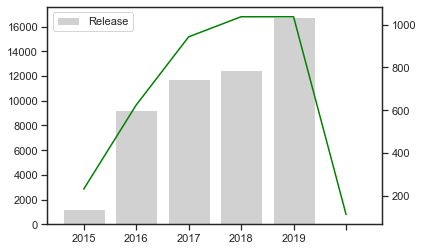

In [4]:
#sys.path.append(os.path.abspath(os.path.join(os.path.dirname(os.path.realpath("__file__")), '..', 'src')))  # append parent directory to search path
from pandas import DataFrame

df_eg = DataFrame()
df_eg=DataFrame(data=[(1212,231),(9283,624),(11734,943),(12452,1037),(16766,1037),(120,113)],index=[2014,2015,2016,2017,2018,2019],columns=["Release","Hold"])
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df_eg.index, df_eg["Release"], color=(190/255,190/255,190/255,0.7), label='Release')
ax2.plot(df_eg.index, df_eg["Hold"], color='green', label='Hold')
ax.set_xticklabels(df_eg.index)
ax.legend(loc='best')

### Multiple plots on same fig.

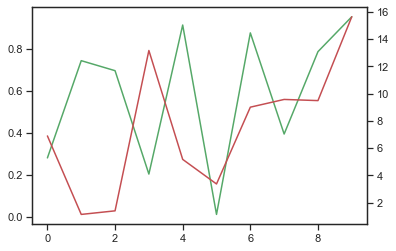

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(pd.Series(np.random.uniform(0,1,size=10)), color='g')
ax2 = ax1.twinx()
ax2.plot(pd.Series(np.random.uniform(0,17,size=10)), color='r')
ax2.grid(False)
plt.show()

### Load datasets (cached, so not too slow after the first time, which takes a few minutes)

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys, os, getpass, warnings
warnings.filterwarnings('ignore')
from patterns.visualizer import Visualizer
from patterns.fetcher import *
vis = Visualizer(project_name='tau2')
vis.get_data()
df = vis.commit_data

INFO: Loaded local cached copy of tau2 data.
INFO: Cleaning up data and computing averages...
INFO: Done computing averages. 116780 file changes (code only)


INFO: Loaded local cached copy of tau2 data.
INFO: Cleaning up data and computing averages...
INFO: Done computing averages. 116780 file changes (code only)


In [2]:
Visualizer.cmap = "YlGnBu"
sns.color_palette(Visualizer.cmap, as_cmap=True)
df = vis.plot_zone_heatmap(agg='sum')

NameError: name 'sns' is not defined

INFO: Creating developer matrix...


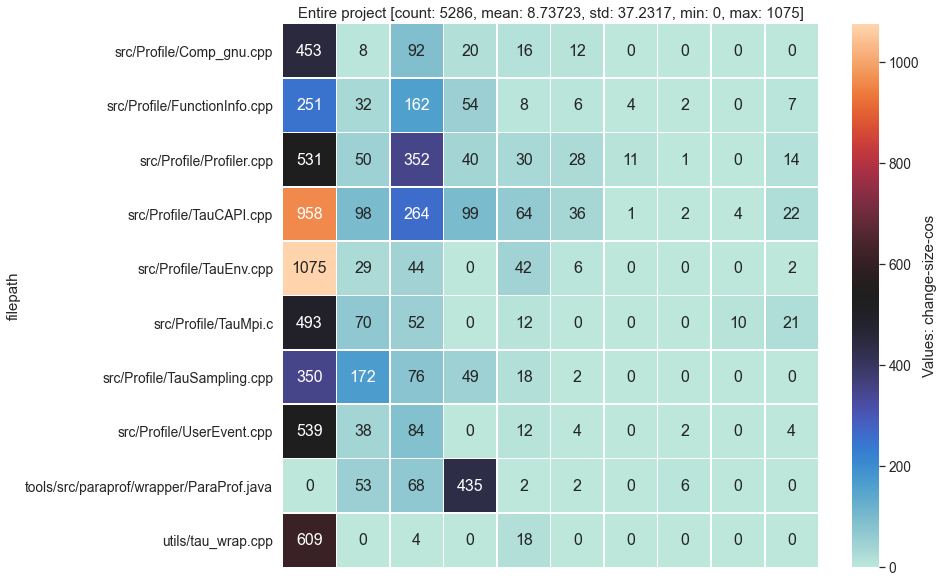

In [83]:
vis.set_max_label_length(30)
d = vis.plot_top_N_heatmap(top_N = 10, locc_metric='change-size-cos')#, my_df=df)

INFO: Loaded local cached copy of spack data.
INFO: Cleaning up data and computing averages...
INFO: Done computing averages. 64909 file changes (code only)
INFO: Creating developer matrix...


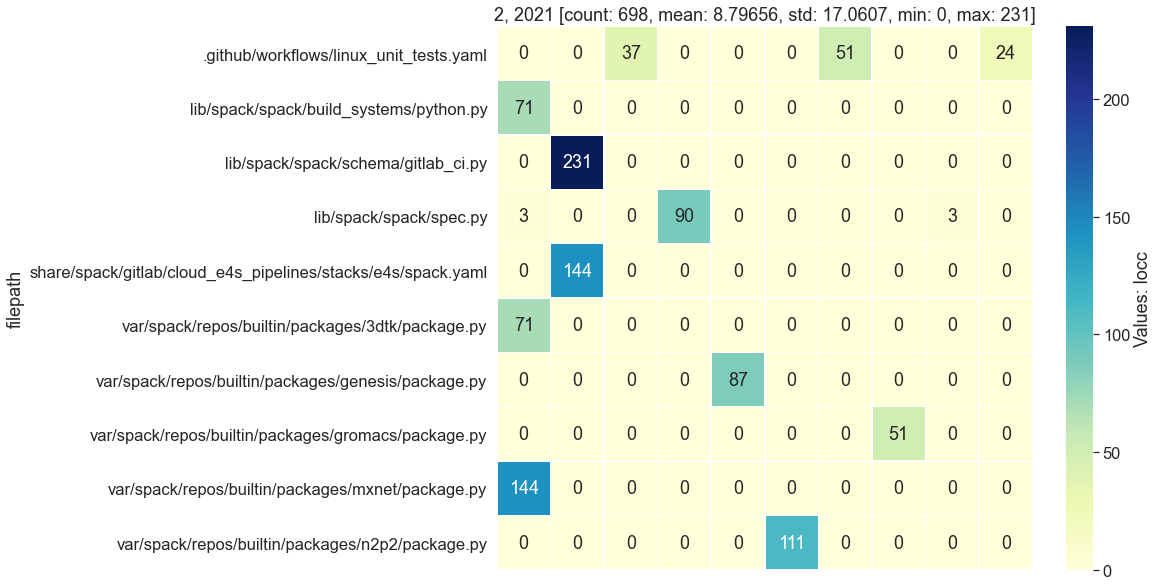

In [7]:
vis = Visualizer(project_name='spack')
vis.get_data()
vis.set_year(2021)
vis.set_month(2)
import seaborn as sns
sns.set(font_scale=1.5)
d = vis.plot_top_N_heatmap(time_range="month", top_N = 10, locc_metric='locc')#, my_df=df)

In [ ]:
df_avg = df.resample('D')
f_avg_pd.head(15).sort_values('average timegap (days)', ascending=False)[['average timegap (days)', 'avg_changes (per commit)']].plot.bar(figsize=(12,9), title='average timegap (days) vs avg changes (spack)', xticks=range(15))

### Days of the week

,dow,hour,year,month,day,doy,locc-basic,locc,locc-,locc+,change-size-cos,change-size-jaccard
0,Monday,0,427559,898,1194,21708,45128,45034,44432,508,44,44
1,Monday,1,20079,89,170,2567,33,24,0,15,6,6
2,Monday,2,42189,207,291,5943,644,503,36,326,11,11
3,Monday,3,38111,116,269,3196,950,720,368,122,13,13
4,Monday,4,302250,1550,3350,45850,800,750,0,700,50,50


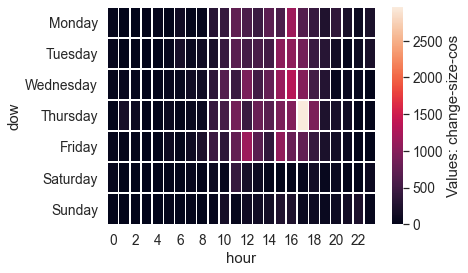

In [132]:
locc_metric='change-size-cos'
#df1 = df.resample('dow').sum()#.groupby(['dow']).sum()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['hour'] = df['datetime'].dt.hour
wh = df.groupby(["dow", "hour"]).sum()#.reindex()#.reindex(labels=weekdays)
wh.reset_index(level=wh.index.names, inplace=True)
heat_wh = wh.pivot(index="dow", columns="hour", values=locc_metric)
sns.heatmap(heat_wh, linewidths=.5, cbar_kws={'label': 'Values: %s' % locc_metric})
wh.head()

,year,month,day,doy,locc-basic,locc,locc-,locc+,change-size-cos,change-size-jaccard
dow,,,,,,,,,,
Monday,39482738,117083,331647,3285092,833603,763601,217821,475778,7532,7532
Tuesday,43521800,135734,327659,3783348,936278,910057,76967,806869,7717,7717
Wednesday,43401057,142158,334528,3990634,643612,609659,103643,472063,8727,8727
Thursday,48326538,117258,306517,3133876,983241,953472,324682,599021,10714,10714
Friday,38599489,116008,290520,3220459,711554,678919,146814,499470,7898,7898


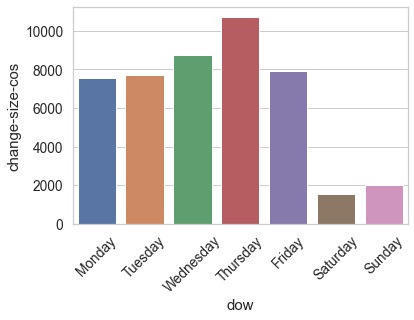

In [101]:
import seaborn as sns
cat_type = pd.CategoricalDtype(categories=weekdays, ordered=True)
df['dow'] = df['dow'].astype(cat_type)
df1 = df.groupby(df['dow']).sum().reindex()
#df1.plot(y=locc_metric,kind ='bar')
sns.barplot(data=df1, x=df1.index, y='change-size-cos')
plt.xticks(rotation = 45)
df2 = df.groupby(['year','dow']).sum() #.(df['dow']).sum()
df2 = df2[locc_metric].unstack(level=0)
#df2.reset_index(level=df.index.names, inplace=True)
df1.head()

In [5]:
#df.plot(y='locc', ax=ax, kind='bar')
df.head()
fig,ax = plt.subplots(figsize=(14,10))
sns.color_palette("YlOrBr", as_cmap=True)
with sns.axes_style("whitegrid"):
    #g = sns.barplot(data=df1, x=index, y='change-size-cos', hue='year', ax=ax)
    sns.heatmap(df, annot=True, linewidths=.5, ax=ax, fmt='g', cmap="YlOrBr",
                cbar_kws={'label': 'Values: %s' % 'cos'})
    fig.legend(loc='right', ncol=1)
    plt.xticks(rotation = 45)

AttributeError: 'NoneType' object has no attribute 'head'

INFO: Loaded local cached copy of spack data.
INFO: Cleaning up data and computing averages...
INFO: Done computing averages. 64909 file changes (code only)
INFO: Loaded local cached copy of lammps data.
INFO: Cleaning up data and computing averages...
INFO: Done computing averages. 82494 file changes (code only)
INFO: Loaded local cached copy of petsc data.
INFO: Cleaning up data and computing averages...
INFO: Done computing averages. 186694 file changes (code only)
INFO: Loaded local cached copy of Nek5000 data.
INFO: Cleaning up data and computing averages...
INFO: Done computing averages. 4582 file changes (code only)
INFO: Loaded local cached copy of E3SM data.
INFO: Cleaning up data and computing averages...
INFO: Done computing averages. 46489 file changes (code only)
INFO: Loaded local cached copy of qmcpack data.
INFO: Cleaning up data and computing averages...
INFO: Done computing averages. 53713 file changes (code only)
INFO: Loaded local cached copy of qdpxx data.
INFO: Cl

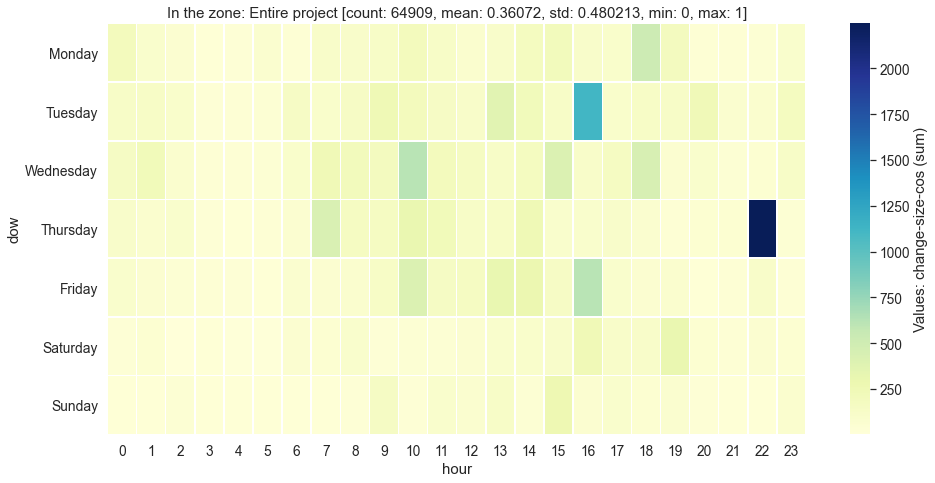

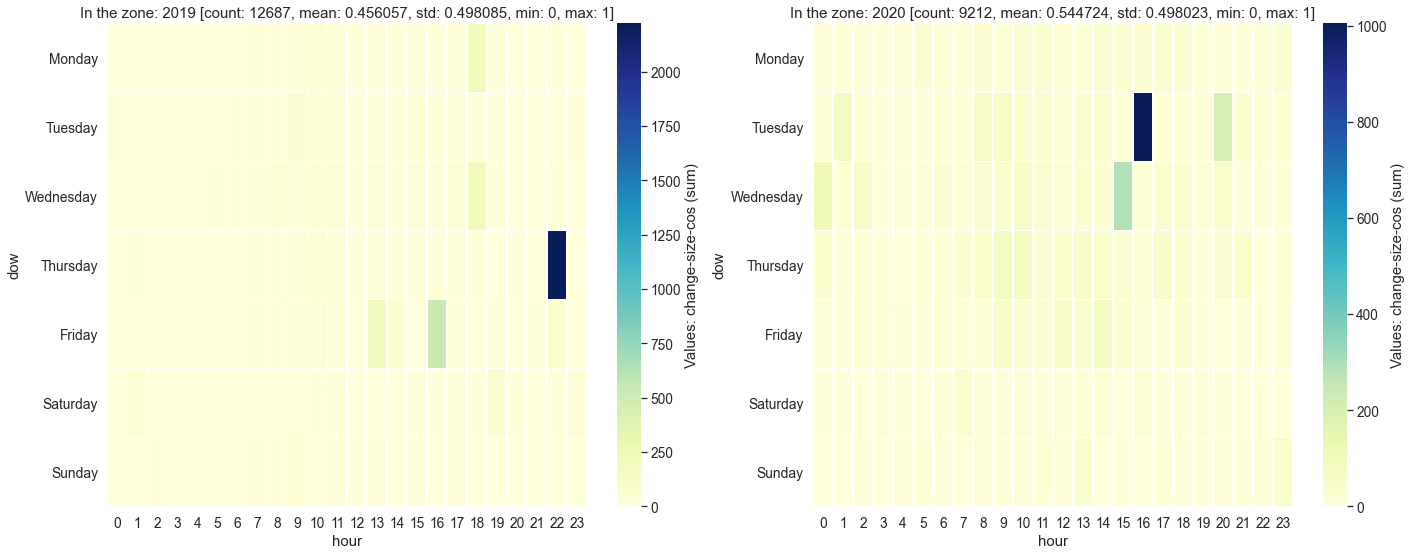

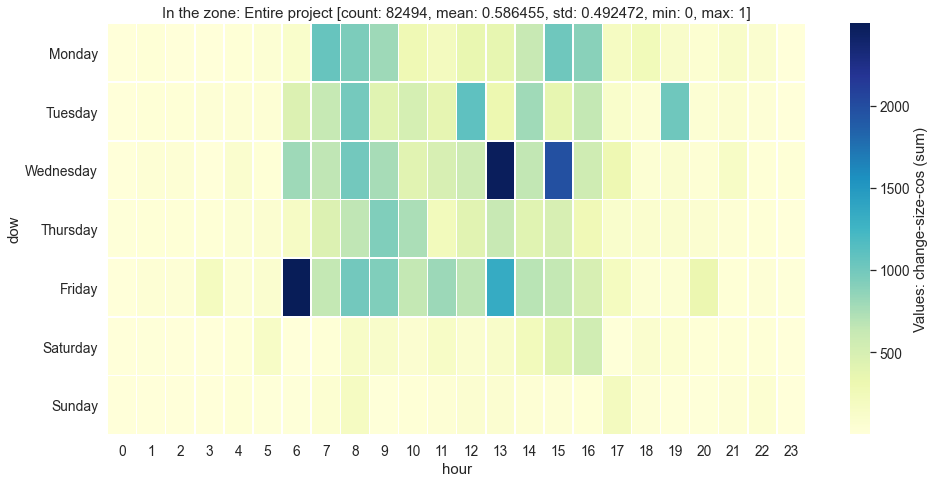

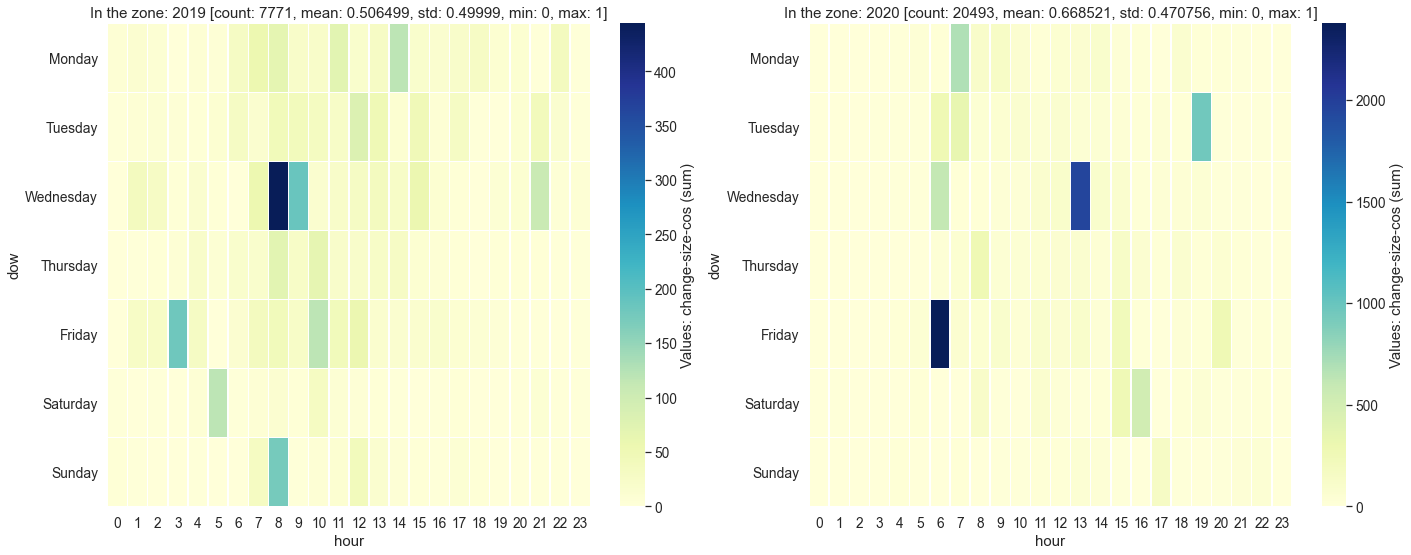

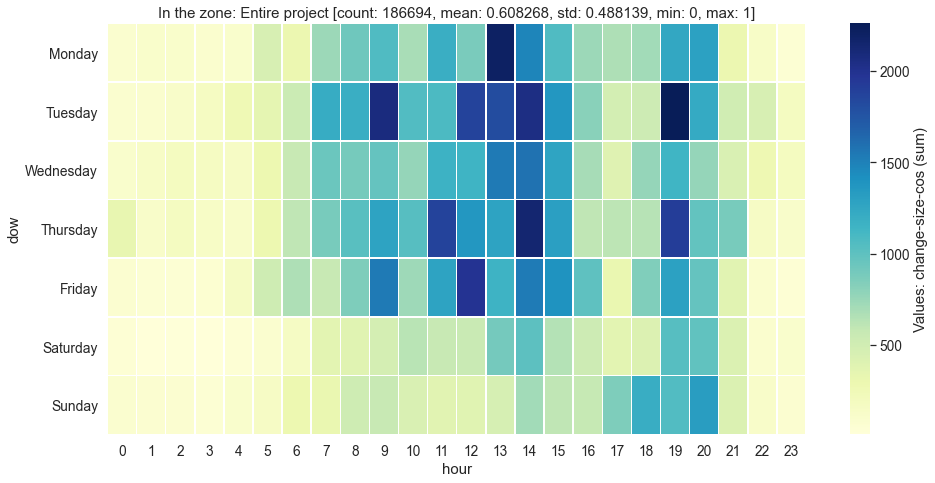

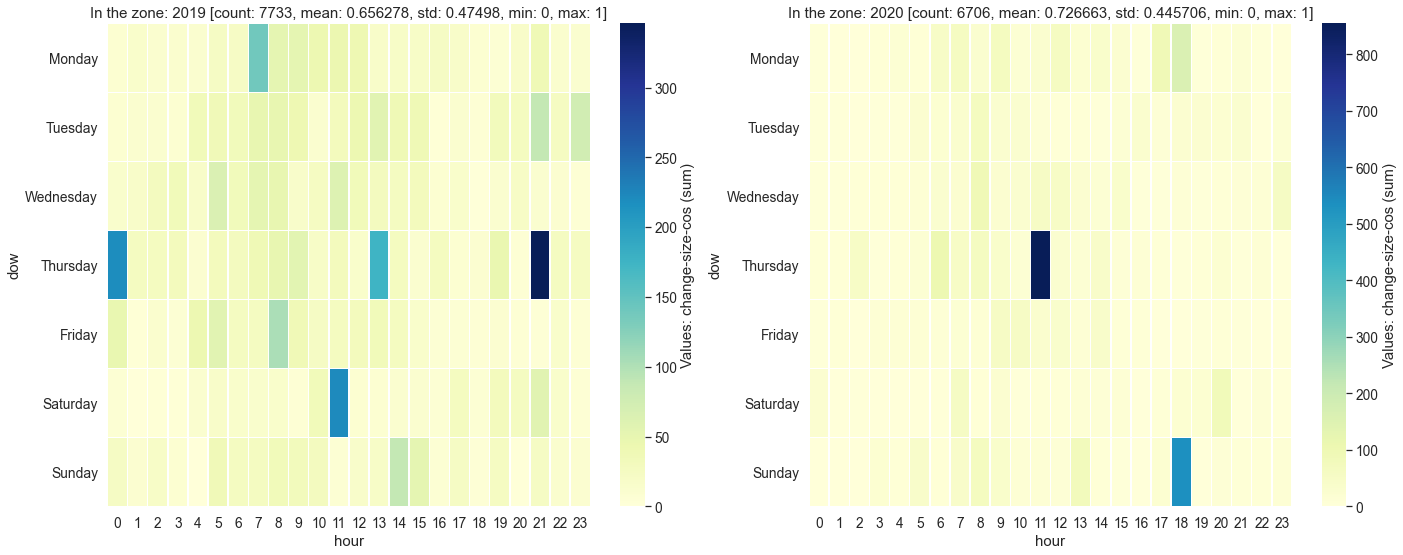

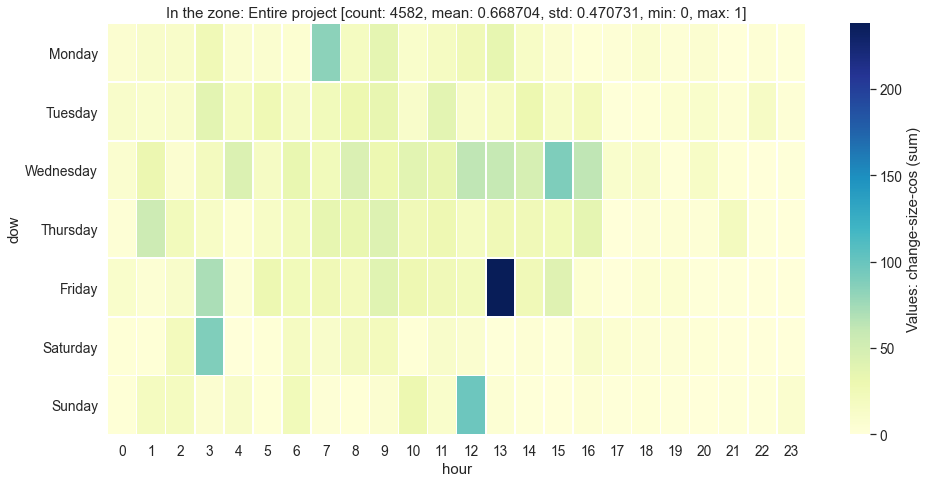

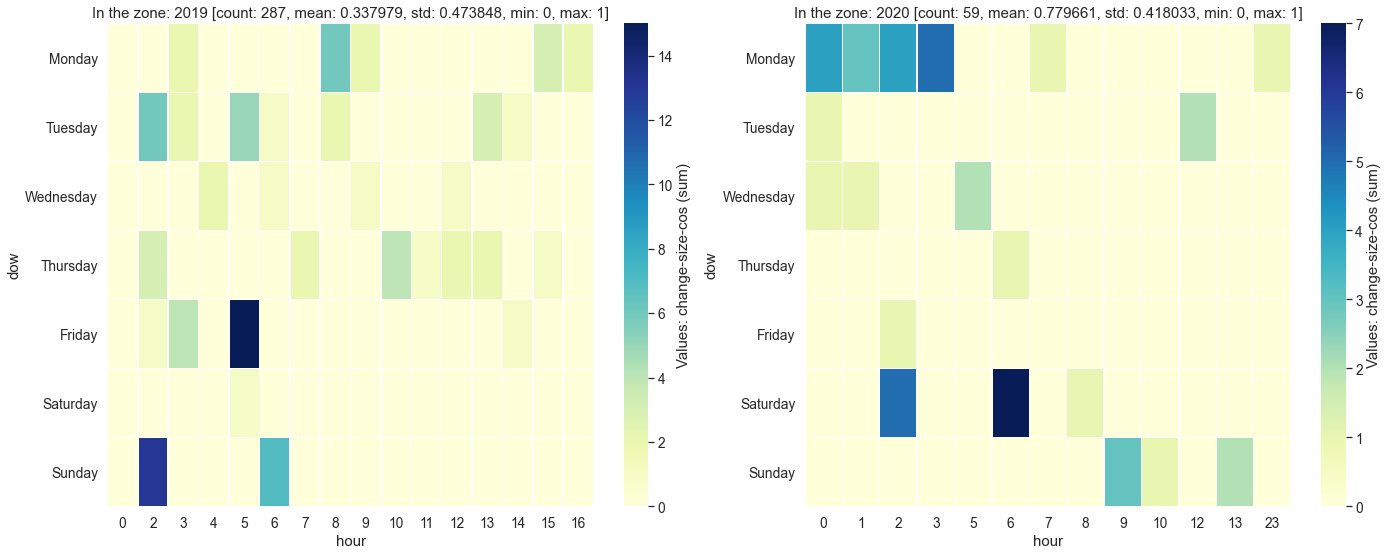

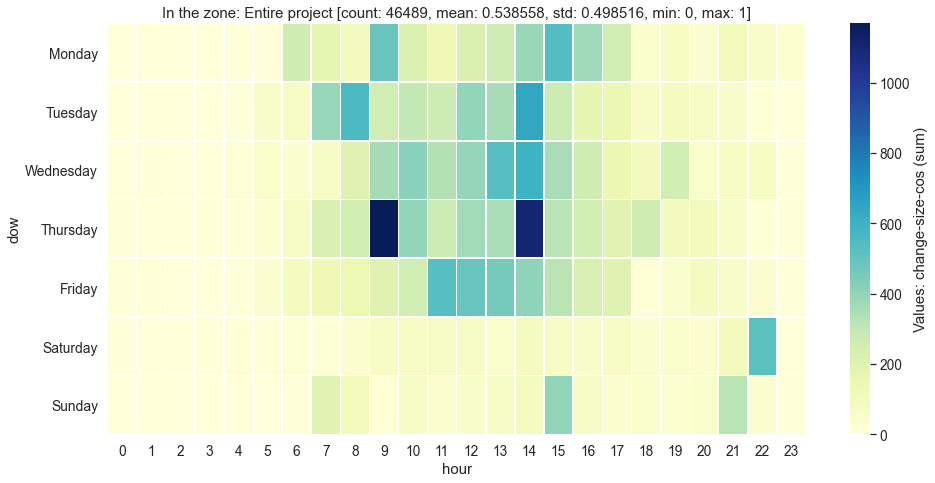

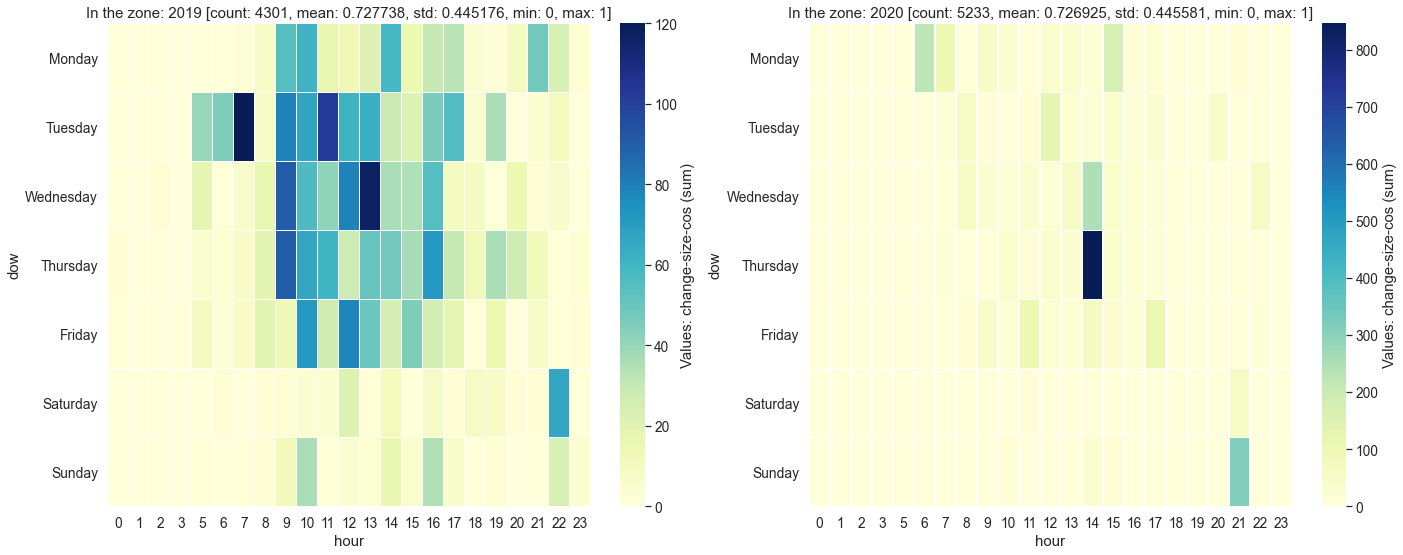

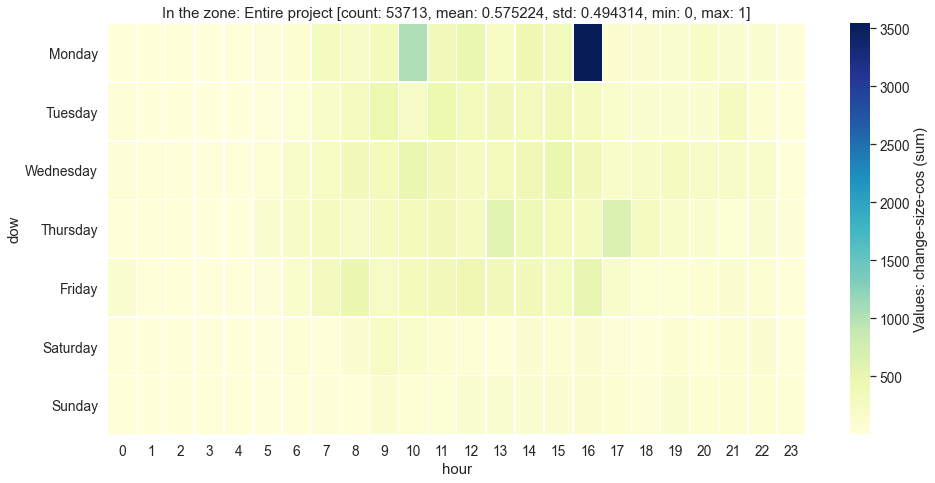

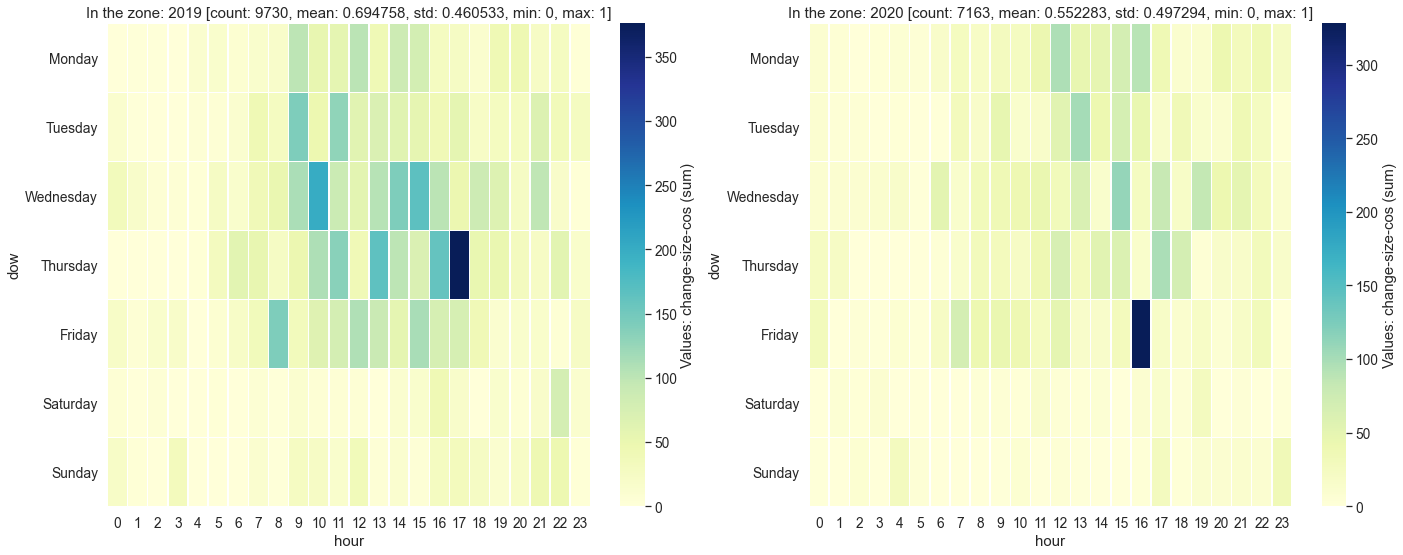

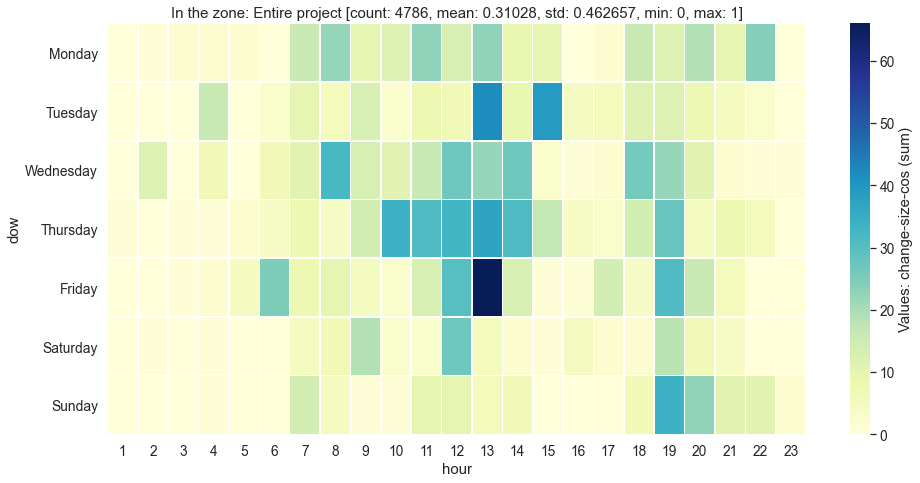

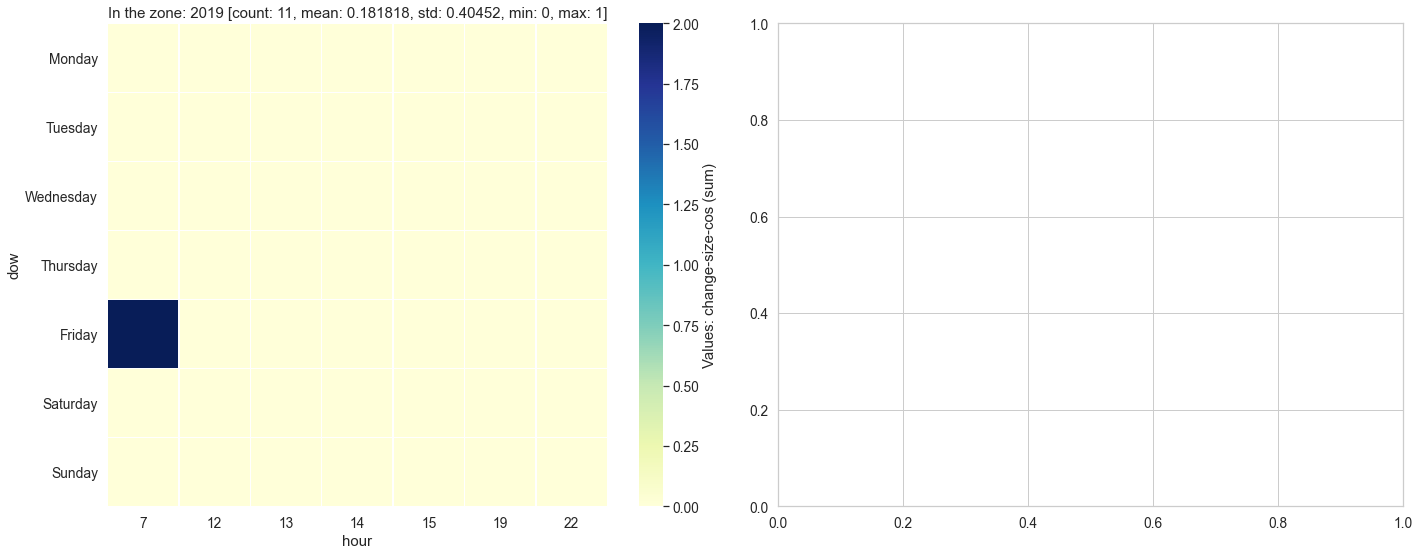

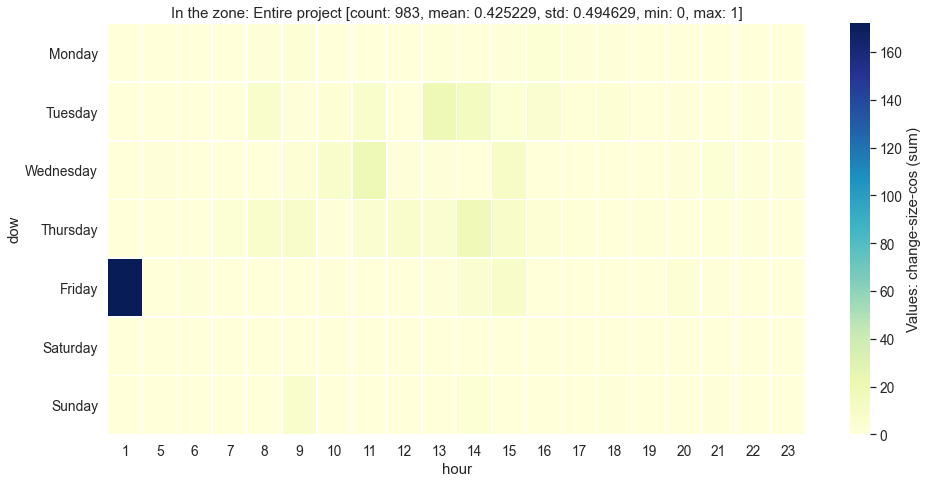

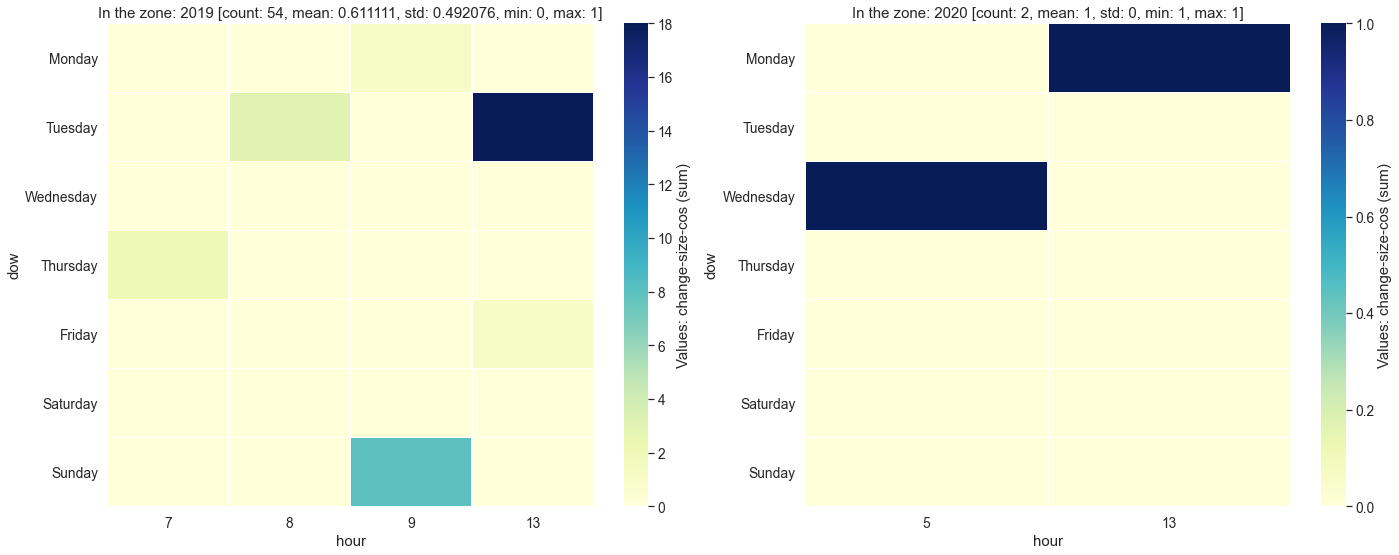

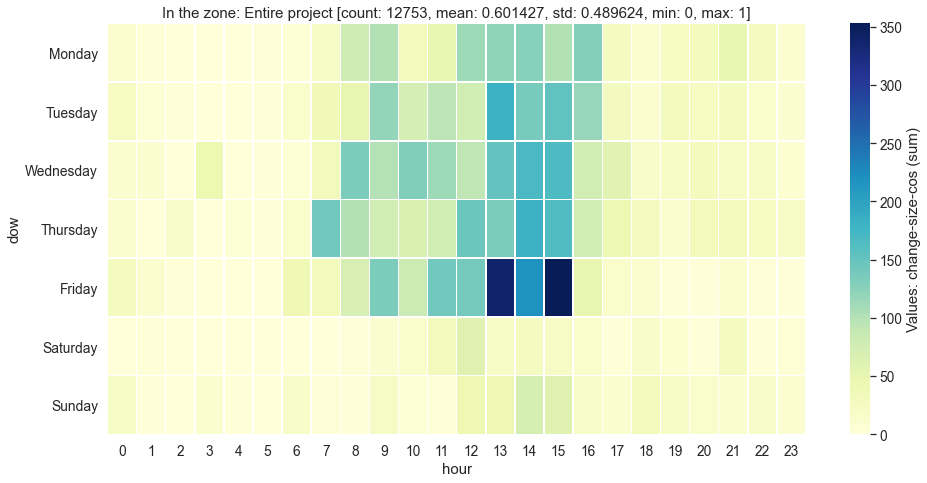

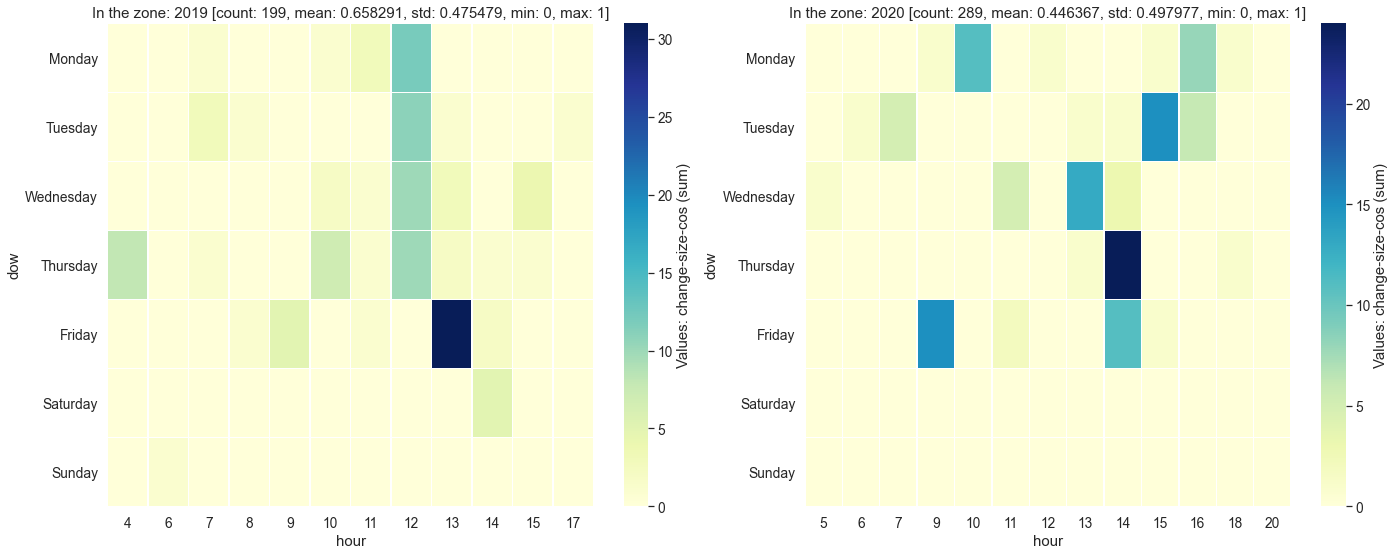

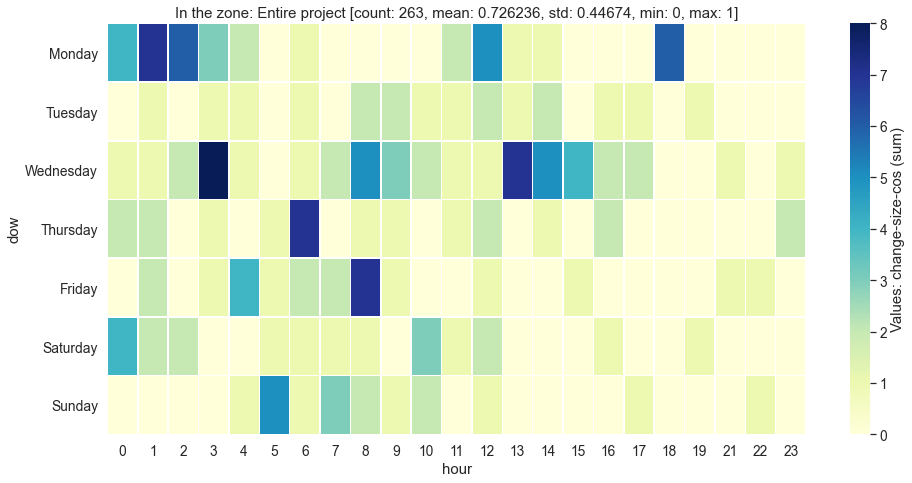

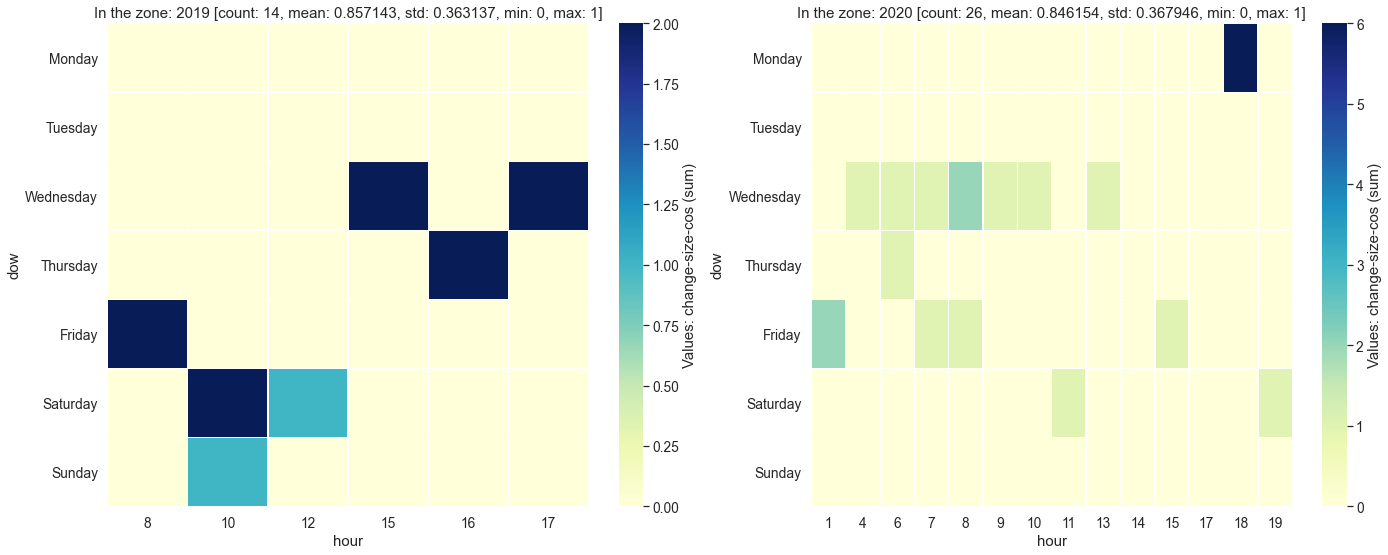

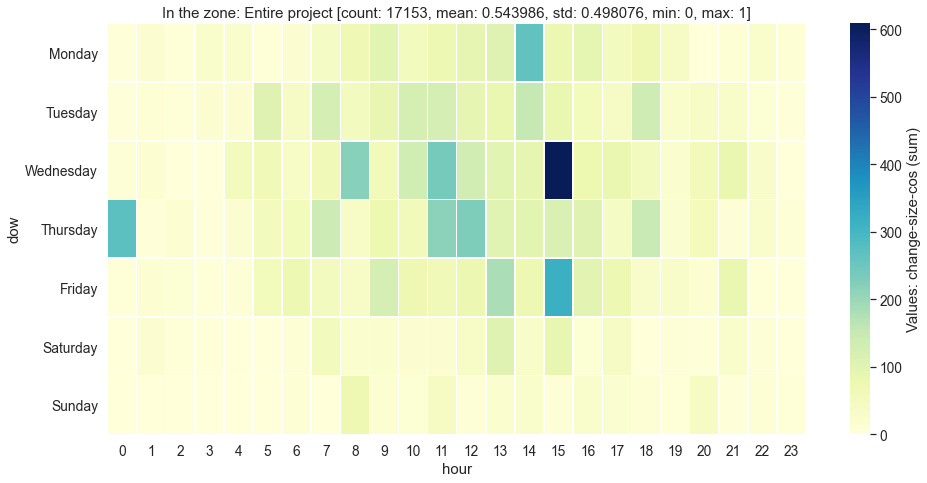

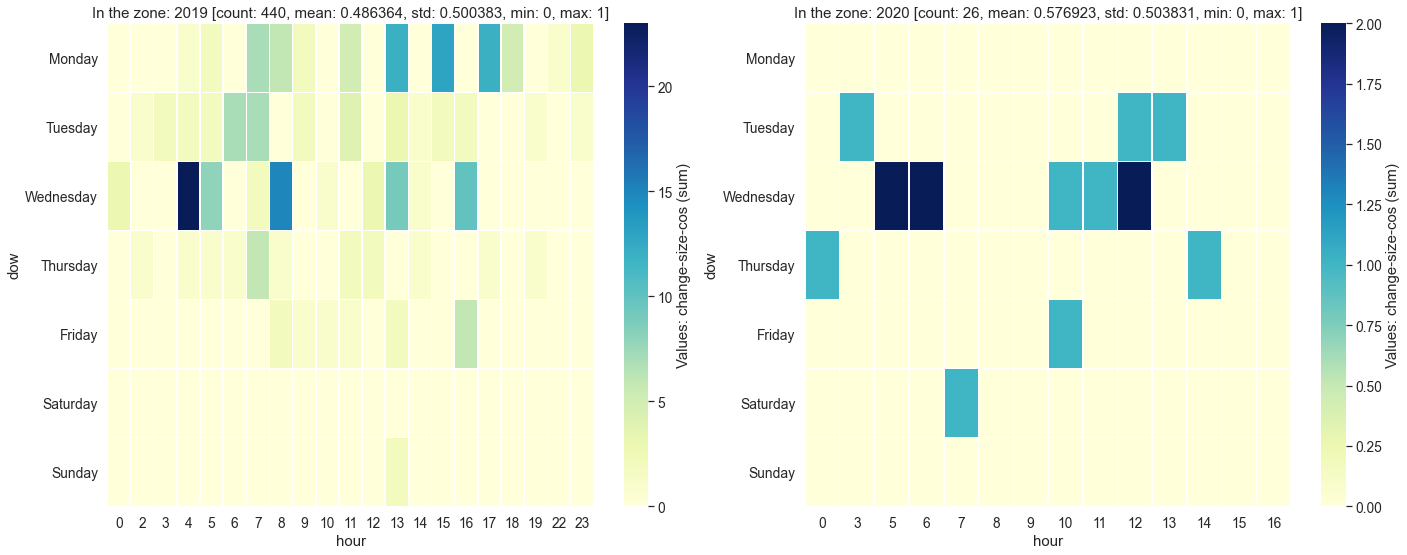

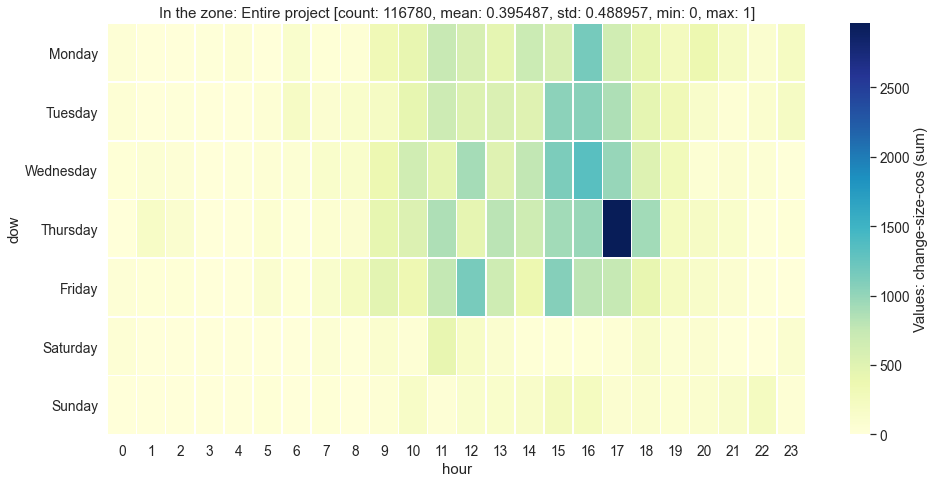

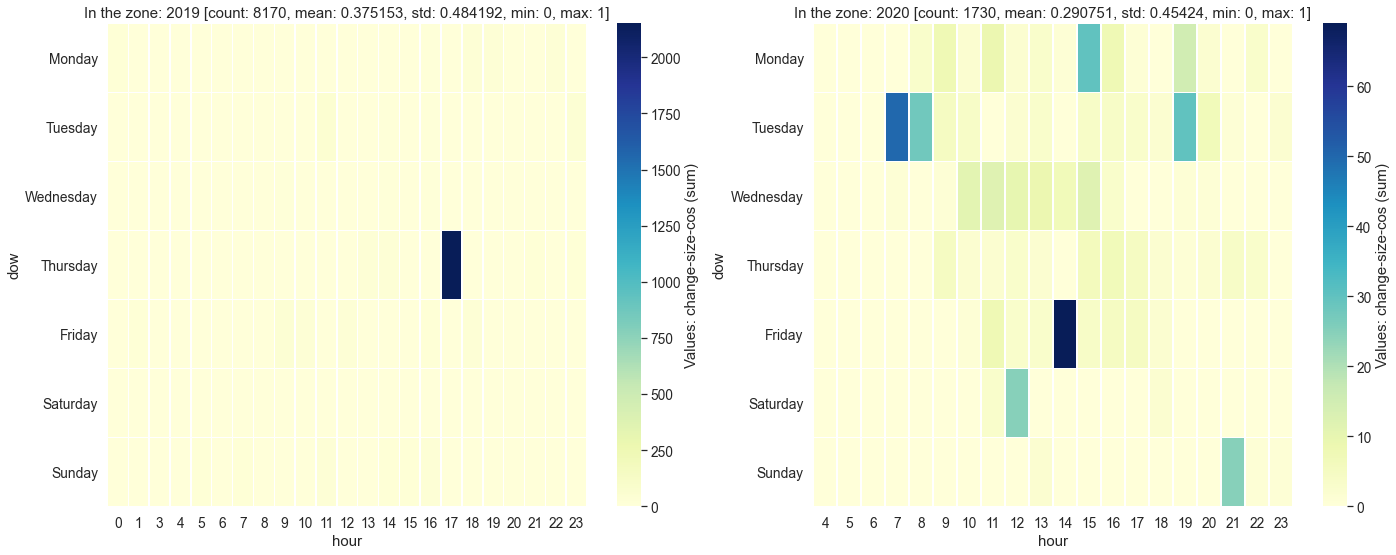

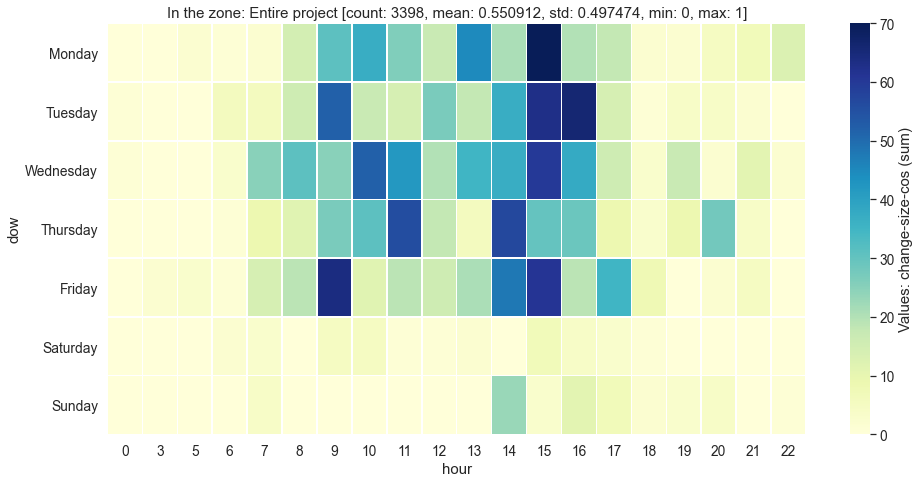

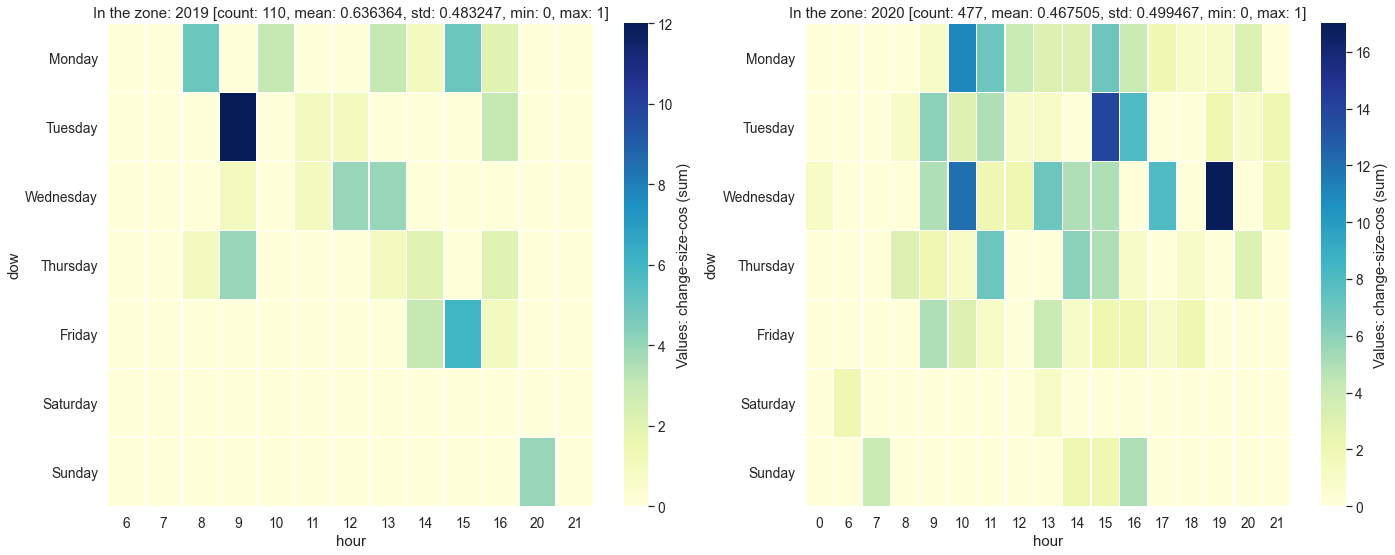

In [2]:
#"spack lammps petsc Nek5000 E3SM qmcpack qdpxx LATTE namd fast-export enzo-dev tau2 xpress-apex nwchem"
for p in "spack lammps petsc Nek5000 E3SM qmcpack qdpxx LATTE namd fast-export enzo-dev tau2 xpress-apex".split():
    try:
        vis = Visualizer(project_name=p)
        vis.get_data()
        df = vis.plot_zone_heatmap(agg='sum')
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
        vis.set_year(2019)
        df_2019 = vis.plot_zone_heatmap(time_range='year',fig_ax_pair = (fig,axes[0]),agg='sum')
        vis.set_year(2020)
        df_2020 = vis.plot_zone_heatmap(time_range='year',fig_ax_pair = (fig,axes[1]),agg='sum')
        #v.set_unique_authors()
        #v.update_cache()
    except:
        pass

In [6]:
vis = Visualizer(project_url='https://github.com/HPCL/ideas-uo.git')

INFO: Loading data from database. This can take a while...
INFO: Loaded ideas-uo data from the database (url: https://github.com/HPCL/ideas-uo.git, 


True

In [2]:
vis_lammps = Visualizer(project_name='lammps')
vis_lammps.get_data()

INFO: Loaded local cached copy of lammps data.
DONE
INFO: Done computing averages.


In [3]:
vis_spack = Visualizer(project_name='spack')
vis_spack.get_data()
vis.make_file_developer_df(10, value_column='locc')
vis.update_cached_data()

INFO: Loaded local cached copy of spack data.
INFO: Cleaning up data and computing averages...
INFO: Done computing averages. 64909 commits (code only)


In [4]:
diffs = vis_spack.commit_data['diff'].str.split(pat="\n")

In [82]:
pd.options.display.max_rows = 999

In [2]:
vis_petsc = Visualizer(project_name='petsc')
vis_petsc.get_data()

In [2]:
N = 10
vis.set_max_label_length(30)
top_N = vis_petsc.plot_top_N_heatmap(N, value_column='locc')
top_N.head()

INFO: Loaded local cached copy of petsc data.
INFO: Done computing averages.


In [8]:
df = vis_petsc.commit_data.head(200)
for t,m in df.message.to_dict().items():
    print(t,m)

2021-02-10 11:02:01 git: switch default branch from 'master' to 'main'
2021-02-10 12:47:39 switch master to main (release)
2021-02-22 06:53:32 KSPMonitorDefault,KSPMonitorTrueResidualNorm,KSPMonitorTrueResidualMax: set as deprecated
2021-02-11 13:30:36 docs: fix typo
    
    Reported-by: Greg Vernon <greg@coreform.com>
2021-02-09 08:41:12 PetscOptionsInt: fix manpage to match the macro def - where the first arg (PetscOptionsObject) is predefined
    
    Reported-by: Carsten Uphoff <uphoff@geophysik.uni-muenchen.de>
2021-02-03 08:41:07 Increase patchlevel to 3.14.4
2021-02-02 15:20:26 configure: fix download-petsc4py map to with-petsc4py in sync with c58b03af228421217c56570126f2df4f99113d30
2021-02-02 14:26:50 slepc: update to 3.14.2. This fixes --download-slepc4py
2021-01-23 22:34:18 CI: update linux-cuda-double to use -j1 [to avoid resource errors at runtime]
    and swap with linux-cuda-double-64idx in stage-3
2021-01-19 07:56:35 openmpi: use -show
2021-01-15 11:37:54 versionToTupl

In [46]:
#vis.commit_data['name-email'] = vis.commit_data['author'] + vis.commit_data['email']

df.head(10)

(346, 4)


,author,email,locc,author_email
1,Adam Denchfield,adenchfi@hawk.iit.edu,2236,Adam Denchfield: adenchfi
2,Adam Oberman,oberman@mcs.anl.gov,8461,Adam Oberman: oberman
3,Administrator,Administrator@cb205779-a,151,Administrator: Administrator
4,Adrian Croucher,a.croucher@auckland.ac.nz,19,Adrian Croucher: a.croucher
5,Adrian Maldonado,dmaldona@hawk.iit.edu,1720,Adrian Maldonado: dmaldona
6,Adrián Németh,nemethedr@gmail.com,218,Adrián Németh: nemethedr
7,Albert Cowie,arcowie@buffalo.edu,896,Albert Cowie: arcowie
8,Alejandro Lamas Daviña,alejandro.lamas@dsic.upv.es,2729,Alejandro Lamas Daviña: alejandro.lamas
9,Alejandro Otero,aotero@fi.uba.ar,27,Alejandro Otero: aotero
10,Alex Fikl,alexfikl@gmail.com,1219,Alex Fikl: alexfikl


In [113]:
from fuzzywuzzy import process, fuzz
df = pd.DataFrame(vis_petsc.commit_data.groupby(['author'])['sha'].count())
df.reset_index(level=df.index.names, inplace=True)
df['commits'] = df['sha']
df.drop(columns=['sha'])
df['name_size'] = df['author'].map(lambda x: len(x))
df = df.sort_values(by=['name_size','author'], ascending=[False,True])
df = df[(df['author'] != '') & (df['sha'] != 0)]
df.head(100)

,author,sha,commits,name_size
160,Pierre Barbier de Reuille,30,30,25
62,Elliott Sales de Andrade,7,7,24
8,Alejandro Lamas Daviña,112,112,22
185,Stefan Lemvig Glimberg,1,1,22
22,Asbjørn Nilsen Riseth,8,8,21
28,Bernhard M. Wiedemann,7,7,21
55,Desire Nuentsa_wakam,1,1,20
92,Jacob Faibussowitsch,65,65,20
125,Lois Curfman McInnes,4628,4628,20
64,Emil Constantinescu,182,182,19


In [114]:
results = {}
for name in df.author:
    ratio = process.extract( str(name), df.author, limit=10)
    results[name] = ratio
threshold = 90
real_names = {}
count = 0
done = []
for nm, val in results.items():
    #print(nm, ":")
    for entry in val:
        name, score, v = entry
        if score < threshold: break
        if name not in done: 
            real_names[count] = [name,nm]
            done.append(name)
        count += 1
df2 = pd.DataFrame.from_dict(real_names, orient='index', columns=['author','unique_author'])
mdf = df.merge(df2, how='inner', on='author')
mdf.head(300)

,author,sha,commits,name_size,unique_author
0,Pierre Barbier de Reuille,30,30,25,Pierre Barbier de Reuille
1,Elliott Sales de Andrade,7,7,24,Elliott Sales de Andrade
2,Alejandro Lamas Daviña,112,112,22,Alejandro Lamas Daviña
3,Stefan Lemvig Glimberg,1,1,22,Stefan Lemvig Glimberg
4,Asbjørn Nilsen Riseth,8,8,21,Asbjørn Nilsen Riseth
5,Bernhard M. Wiedemann,7,7,21,Bernhard M. Wiedemann
6,Desire Nuentsa_wakam,1,1,20,Desire Nuentsa_wakam
7,Jacob Faibussowitsch,65,65,20,Jacob Faibussowitsch
8,Lois Curfman McInnes,4628,4628,20,Lois Curfman McInnes
9,Emil Constantinescu,182,182,19,Emil Constantinescu


In [117]:
df.drop(columns=['sha','name_size'])
vis_petsc.commit_data.merge(df2, how="inner", on="author")

,sha,branch,author,email,message,filepath,diff,year,month,day,doy,dow,diff_summary,locc-basic,locc,locc-,locc+,change-size-cos,unique_author
0,9dddd24924da2034e9ad37bd0330bf8579e05078,* main\n remotes/origin/HEAD -> origin/main\n...,Satish Balay,balay@mcs.anl.gov,git: switch default branch from 'master' to 'm...,.travis.yml,- - master\n+ - main\n--- a/CONTRIBUTING...,2021,2,10,41,Wednesday,-+,2,1,0,0,1,Satish Balay
1,9dddd24924da2034e9ad37bd0330bf8579e05078,* main\n remotes/origin/HEAD -> origin/main\n...,Satish Balay,balay@mcs.anl.gov,git: switch default branch from 'master' to 'm...,config/BuildSystem/config/package.py,- self.gitcommitmaster = None # Git ...,2021,2,10,41,Wednesday,-+,2,1,0,0,1,Satish Balay
2,9dddd24924da2034e9ad37bd0330bf8579e05078,* main\n remotes/origin/HEAD -> origin/main\n...,Satish Balay,balay@mcs.anl.gov,git: switch default branch from 'master' to 'm...,include/petscviewer.h,-PETSC_EXTERN PetscErrorCode PetscViewerFlowCo...,2021,2,10,41,Wednesday,,0,0,0,0,0,Satish Balay
3,9dddd24924da2034e9ad37bd0330bf8579e05078,* main\n remotes/origin/HEAD -> origin/main\n...,Satish Balay,balay@mcs.anl.gov,git: switch default branch from 'master' to 'm...,lib/petsc/bin/maint/lex.py,- self.lexre = None # Maste...,2021,2,10,41,Wednesday,-+,2,1,0,0,1,Satish Balay
4,9dddd24924da2034e9ad37bd0330bf8579e05078,* main\n remotes/origin/HEAD -> origin/main\n...,Satish Balay,balay@mcs.anl.gov,git: switch default branch from 'master' to 'm...,setup.py,- $ python -m pip install --no-deps https:/...,2021,2,10,41,Wednesday,-+,2,1,0,0,1,Satish Balay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186689,7b593d2509eccb1038c9a52472301132b3ca537d,* main\n remotes/origin/HEAD -> origin/main\n...,David Keyes,keyes@icase.edu,*** empty log message ***,src/contrib/euler/resid_fp.F,"-c ""$Id: resid_fp.F,v 1.4 1997/10/11 22:22:30...",1997,10,11,284,Saturday,--++-+,6,3,0,0,1,David Keyes
186690,28b23824c2cd105525960c8afe02a39ed1314b3d,* main\n remotes/origin/HEAD -> origin/main\n...,David Keyes,keyes@icase.edu,*** empty log message ***,src/contrib/euler/resid_fp.F,"-c ""$Id: resid_fp.F,v 1.3 1997/10/11 18:39:18...",1997,10,11,284,Saturday,-++,3,2,0,1,1,David Keyes
186691,b50c66e3935f9c9fd36772971111e19f91eab85c,* main\n remotes/origin/HEAD -> origin/main\n...,David Keyes,keyes@icase.edu,*** empty log message ***,src/contrib/euler/rbuild_fp.F,"-c ""$Id: ex1f.F,v 1.16 1997/09/22 15:20:58 ba...",1997,10,11,284,Saturday,+++++++++++++++++++++++++++++-----+-----++++++...,236,204,111,61,1,David Keyes
186692,77f1bf504df5085ce3cb6f52a55d24dfaf545521,* main\n remotes/origin/HEAD -> origin/main\n...,David Keyes,keyes@icase.edu,"added coordinates to call to IC_fp, for initia...",src/contrib/euler/xnd.F,-c Read input and set up initial conditions\n+...,1997,10,10,283,Friday,-+,2,1,0,0,1,David Keyes


In [2]:
from matplotlib.cbook import get_sample_data
from os.path import join, dirname, abspath
poo_img = plt.imread(get_sample_data(join('/Users/norris/research/ideas-uo/sandbox', "poo-mark.png")))

In [58]:
df = vis_spack.commit_data
df2 = df.resample('M').sum()
df2['month_num'] = pd.DatetimeIndex(df2.index).month
df2 = df2.groupby(['month_num']).sum()
df2.head(12)

,year,month,day,doy,locc,locc-,locc+,change-size-cos
month_num,,,,,,,,
1,20603892,10201,73320,73320,40188,10966,29222,2391.444436
2,5025005,4978,37092,114251,26131,4746,21385,1556.806576
3,11497033,17094,111284,448884,36914,7715,29199,1522.482310
4,5832484,11560,46407,307733,31629,5503,26126,1468.475474
5,6130690,15195,43044,409300,32523,7944,24579,1373.539174
6,8933592,26568,85260,754955,27885,6798,21087,1572.870518
7,6027462,20909,58265,600228,33490,7258,26232,1673.502916
8,7826672,31032,63270,887190,42778,10385,32393,1677.582044
9,8649418,38583,48510,1091163,38267,5674,32593,1300.997838


In [84]:

import os
def get_monthly_totals(df, year=None):
    if year:
        df1 = df[(df['year'] == year)]
    else:
        df1 = df
    df1 = df1.resample('M').sum()
    df1['month_num'] = pd.DatetimeIndex(df1.index).month
    df1 = df1.groupby(['month_num']).mean()
    df1['month_num'] = df1.index
    return df1

def how_was_2020(vis):
    fig, ax = plt.subplots(figsize=(12,8))

    df1 = get_monthly_totals(vis.commit_data, 2019)
    df1.plot(x='month_num', y='change-size-cos', color='blue',linewidth=3, linestyle='--', ax=ax, label='2019')

    df2 = get_monthly_totals(vis.commit_data, 2020)
    df2.plot(x='month_num', y='change-size-cos', color='brown',linewidth=3, linestyle='-', ax=ax, label='2020')

    # Average
    d = get_monthly_totals(vis.commit_data)
    d.plot(x='month_num', y='change-size-cos', color='green',linewidth=3, linestyle=':', ax=ax, label='Average')

    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    #plt.title('Monthly total changes', fontsize=20)
    plt.xlabel('Month', fontsize=24)
    plt.ylabel('Monthly total code change (cos diff)', fontsize=24)
    legend = ax.legend(fancybox=False, fontsize=24, ncol=3, loc='upper left')
    legend.get_frame().set_facecolor('white')
    legend.set_title(vis.project_name.capitalize(), prop = {'size':'x-large'})

    if True:
        from matplotlib.cbook import get_sample_data
        poo_img = plt.imread(get_sample_data(os.path.join(os.path.dirname(os.path.realpath("__file__")),'images', 'poo-mark.png')))
        x = df2.index.to_list()
        y = df2['change-size-cos'].to_list()
        ax_width = ax.get_window_extent().width
        fig_width = fig.get_window_extent().width
        fig_height = fig.get_window_extent().height
        poo_size = ax_width/(fig_width*len(x))
        poo_axs = [None for i in range(len(x))]
        for i in range(len(x)):
            loc = ax.transData.transform((x[i], y[i]))
            poo_axs[i] = fig.add_axes([loc[0]/fig_width-poo_size/2, loc[1]/fig_height-poo_size/2,
                                   poo_size, poo_size], anchor='C')
            poo_axs[i].imshow(poo_img)
            poo_axs[i].axis("off")

    fig.show()

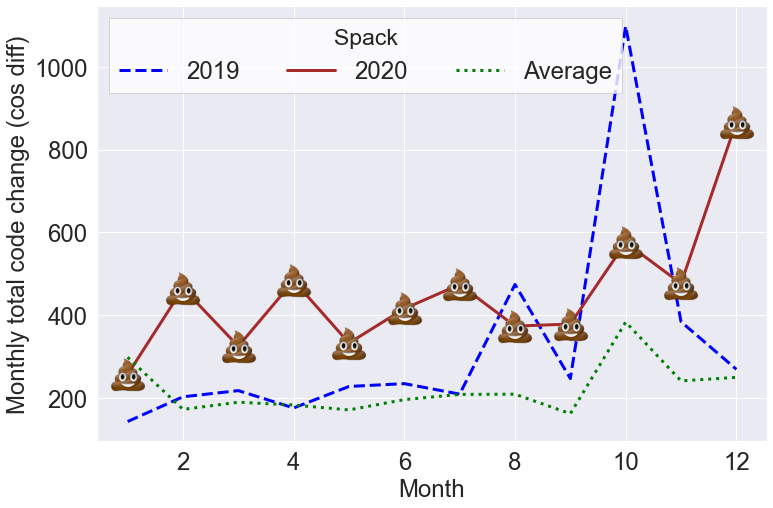

In [81]:
how_was_2020(vis_spack)

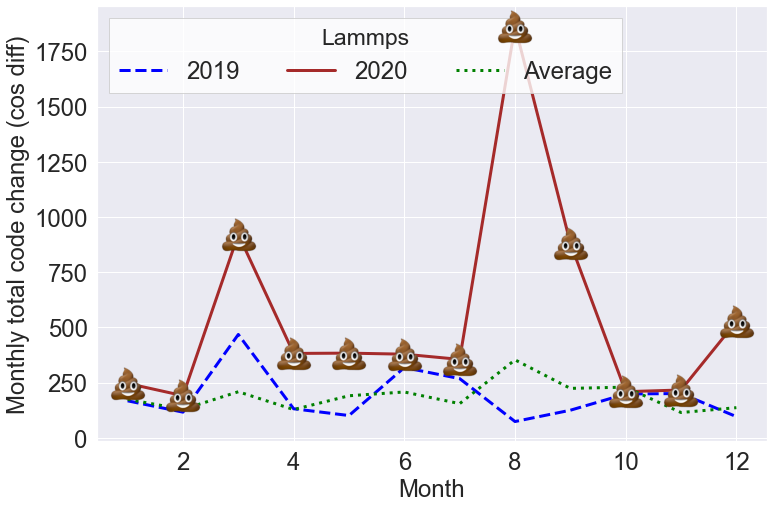

In [85]:
how_was_2020(vis_lammps)

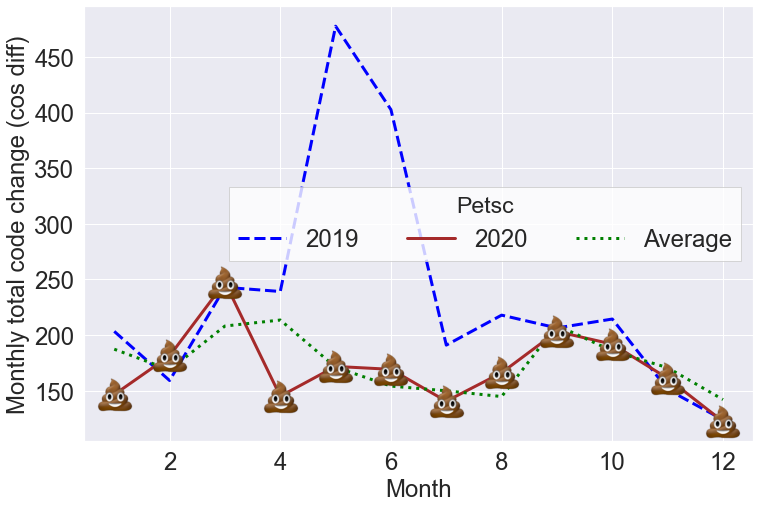

In [83]:
how_was_2020(vis_petsc)

In [ ]:
len_x = df['month'].to_list()
y = df['change-size-cos'].to_list()
ax_width = ax.get_window_extent().width
fig_width = fig.get_window_extent().width
fig_height = fig.get_window_extent().height
poo_size = ax_width/(fig_width*len(x))
poo_axs = [None for i in range(len(x))]
for i in range(len(x)):
    loc = ax.transData.transform((x[i], y[i]))
    poo_axs[i] = fig.add_axes([loc[0]/fig_width-poo_size/2, loc[1]/fig_height-poo_size/2,
                               poo_size, poo_size], anchor='C')
    poo_axs[i].imshow(poo_img)

KeyboardInterrupt: 

In [63]:
import re
edits_summary_re = re.compile(r'(-+\++)')
summary = '++----++-+-+--++--++-+--'
edits = edits_summary_re.findall(summary)
print(edits)   # we want to 

['----++', '-+', '-+', '--++', '--++', '-+']


In [86]:
s = summary
print('num edits:', len(edits))
removed, added, edited = 0, 0, 0
for edit in edits:
    index = s.find(edit)
    print(index,s[:index],edit)
    rm, add = s[:index].count('-'), s[:index].count('+')
    ed_rm, ed_add = edit.count('-'),edit.count('+')
    ed = min(ed_rm,ed_add)
    edited += ed
    print(rm,add,ed)
    removed, added = removed + rm + ed_rm - ed, added + add + ed_add - ed
    print(removed,added,edited)
    s = s[index+len(edit):]  # advance
# trailing changes 
print(s)
removed, added = removed + s.count('-'), added + s.count('+')
print('Final:',removed,added,edited)
# Example input: '++----++-+-+--++--++-+--'
# Example values for removed, added, edited: 4 2 9

num edits: 6
2 ++ ----++
0 2 2
2 2 2
0  -+
0 0 1
2 2 3
0  -+
0 0 1
2 2 4
0  --++
0 0 2
2 2 6
0  --++
0 0 2
2 2 8
0  -+
0 0 1
2 2 9
--
Final: 4 2 9


In [6]:
import MySQLdb 
db = MySQLdb.connect(host='sansa.cs.uoregon.edu', port=3331, user='ideas_user', passwd="cabbage",
                                      db='ideas_db', charset='utf8')
cursor = db.cursor()

In [9]:
cursor.execute('select source_url from project')
cursor.fetchall()

(('https://github.com/lammps/lammps.git',),
 ('https://github.com/spack/spack.git',),
 ('https://github.com/petsc/petsc.git',),
 ('https://github.com/Nek5000/Nek5000.git',),
 ('https://github.com/nwchemgit/nwchem.git',),
 ('https://github.com/E3SM-Project/E3SM.git',),
 ('https://github.com/QMCPACK/qmcpack.git',),
 ('https://github.com/usqcd-software/qdpxx.git',),
 ('https://github.com/UO-OACISS/tau2.git',),
 ('https://github.com/khuck/xpress-apex.git',),
 ('https://github.com/HPCL/ideas-uo.git',),
 ('https://github.com/fickas/ideas-uo.git',))

In [30]:
url='https://github.com/HPCL/ideas-uo.git'

In [36]:
cursor.execute('select name from project where source_url = "%s"' % url)
cursor.fetchall()[0][0]

'ideas-uo'

In [19]:
cursor.fetchall()

IndexError: tuple index out of range